In [1]:
%matplotlib inline
import sys
sys.path.append('../../')
import numpy as np
import h5py
from tools import TDOP
from tools.instruments import instruments

In [2]:
tdopfile = h5py.File('../../data/tdop/tdop_decay_50.hdf', 'r')

In [13]:
savefile = h5py.File('../../data/tdop/resist','a')

In [14]:
for TH in np.arange(0.50, 0.80, 0.1):
    length = len(tdopfile)-1
    for cnt, symbol in enumerate(list(tdopfile)):
        print(f"\r now processing.. {symbol} {TH*100}% ({cnt}/{length})                ", flush=True, end='')
        data = tdopfile[symbol]
        data = TDOP.get_resist(data, TH)
        #lower = np.expand_dims(lower, axis=-1)
        #upper = np.expand_dims(upper, axis=-1)
        #data = np.hstack((lower, upper))
    
        if symbol in savefile:
            group = savefile[symbol]
        else:
            group = savefile.create_group(symbol)
        data = np.array(data)
        dset = group.create_dataset( str(int(TH*100)), shape=data.shape, data=data)
    savefile.flush()
savefile.close()

 now processing.. W 80.0% (39/39)                  

In [12]:
savefile.close()

In [16]:
resist = h5py.File('../../data/tdop/resist','r')

In [17]:
import matplotlib.pyplot as plt

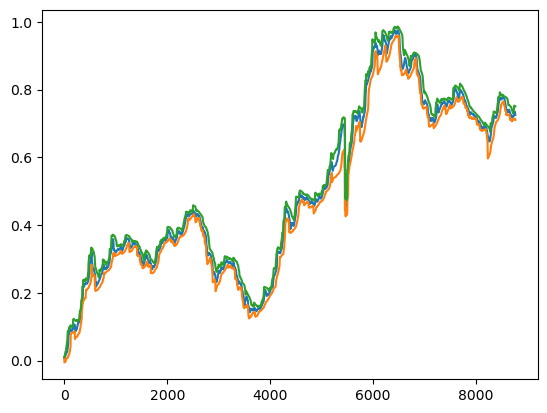

In [19]:
plt.plot(resist['AD']['80'])

In [23]:
resist['AD']['60'][:]

array([[ 0.0092 ,  0.0078 ,  0.01075],
       [ 0.00725, -0.0044 ,  0.00995],
       [ 0.0046 , -0.00405,  0.00965],
       ...,
       [ 0.72755,  0.7151 ,  0.74625],
       [ 0.7263 ,  0.7142 ,  0.7458 ],
       [ 0.72525,  0.7141 ,  0.7453 ]])